In [311]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [312]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)

In [313]:
startup = pd.read_csv('startup_funding.csv')

In [314]:
startup.sample(10)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
1799,1799,01/08/2015,Ressy,Restaurant Discount app,NaN,Pune,Mohandas Pai & others,Seed Funding,"400,000",NaN
2108,2108,14/05/2015,IndianRoots.com,Lifestyle Ecommerce Portal,NaN,Gurgaon,KJS Group,Private Equity,"5,000,000",Series B
896,896,02/6/2016,Coutloot,eCommerce,Fashion Re-Commerce Platform,Mumbai,Venture Catalysts,Seed Funding,NaN,NaN
1473,1473,10/12/2015,Stay Simple Resorts,Holiday Resort Chain,NaN,Bangalore,"Mr. Sudhir & Ms. Shalini Sethi, Mr. Praveen So...",Seed Funding,NaN,NaN
2207,2207,06/03/2015,MapMyGenome,NaN,NaN,NaN,Rajan Anandan & other angel investors,Private Equity,"1,200,000",NaN
1935,1935,10/7/2015,Footprints Education,Pre-School Chain,NaN,Gurgaon,"LetsVenture, Kumar Bansal, Kshitij Jain",Seed Funding,"685,000",NaN
2362,2362,24/01/2015,Aasaanjobs,NaN,NaN,NaN,"Inventus Capital Partners, IDG Ventures",Seed Funding,"1,500,000",NaN
1658,1658,13/10/2015,Voodoo,Mobile Only Shopping Assistant,NaN,New Delhi,SAIF Partners,Seed Funding,"1,000,000",NaN
1631,1631,06/10/2015,SportzVillage,Sports Management & Physical Education Business,NaN,Bangalore,Gaja Capital Private Equity Fund,Private Equity,"10,000,000",Series B
2162,2162,14/04/2015,LocalOye,Hyper-local Online Services,NaN,Mumbai,"Tiger Global Management, Lightspeed Venture Pa...",Private Equity,"5,000,000",Series A


In [315]:
startup.isnull().mean() * 100

SNo                  0.000000
Date                 0.000000
StartupName          0.000000
IndustryVertical     7.209106
SubVertical         39.460371
CityLocation         7.546374
InvestorsName        0.337268
InvestmentType       0.042159
AmountInUSD         35.708263
Remarks             82.335582
dtype: float64

In [316]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SNo               2372 non-null   int64 
 1   Date              2372 non-null   object
 2   StartupName       2372 non-null   object
 3   IndustryVertical  2201 non-null   object
 4   SubVertical       1436 non-null   object
 5   CityLocation      2193 non-null   object
 6   InvestorsName     2364 non-null   object
 7   InvestmentType    2371 non-null   object
 8   AmountInUSD       1525 non-null   object
 9   Remarks           419 non-null    object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


# Data Cleaning

## Dropping Sno. column because it is not useful

In [317]:
startup_prac = startup.drop(['SNo','Remarks'],axis=1)

In [318]:
startup_prac.head()

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000"
1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN
2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN
3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000"
4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000"


## Fixing Date Column and converting it to datetime

In [319]:
startup_prac[startup_prac['Date'] == '22/01//2015']

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
2357,22/01//2015,Corporate360,NaN,NaN,NaN,Group of Angel Investors,Seed Funding,"200,000"


In [320]:
startup_prac.loc[startup_prac[startup_prac['Date'] == '22/01//2015'].index, 'Date'] = '22/01/2015'

In [321]:
startup_prac['Date'] = pd.to_datetime(startup_prac['Date'])

## Adding two new features month and year to the dataset

In [322]:
startup_prac['Year'] = pd.to_datetime(startup_prac['Date']).dt.year
startup_prac['Month'] = pd.to_datetime(startup_prac['Date']).dt.month

## Fixing CityLocation Column 

In [323]:
highest_startup_loc = (startup_prac['CityLocation'].value_counts() > 50).index[:8]
map(str.lower, highest_startup_loc)
highest_startup_loc

Index(['Bangalore', 'Mumbai', 'New Delhi', 'Gurgaon', 'Pune', 'Noida',
       'Hyderabad', 'Chennai'],
      dtype='object')

In [324]:
startup_prac['CityLocation'].fillna('Unknown',inplace=True)
startup_prac['CityLocation'] = startup_prac['CityLocation'].apply(lambda x : x.lower())

In [325]:
def city_location(city):
    if city in highest_startup_loc:
        return city.capitalize()
    elif city == 'unknown':
        return 'unknown'.capitalize()
    else:
        check_city = city.split('/')
        for i in range(len(check_city)):
            if check_city[i].strip() in highest_startup_loc:
                return check_city[i].strip().capitalize()
        return city.capitalize()

In [326]:
startup_prac['CityLocation'] = startup_prac['CityLocation'].apply(city_location)

## Fixing AmountInUSD Column

In [327]:
startup_prac['AmountInUSD'].fillna("0",inplace=True)
startup_prac['NewAmountInUSD'] = startup_prac['AmountInUSD'].apply(lambda x : int(x.replace(',','')))
startup_prac.loc[startup_prac['NewAmountInUSD'] == "0", 'NewAmountInUSD'] = 0
startup_prac['NewAmountInUSD'] = startup_prac['NewAmountInUSD'].astype(int)

## Fixing InvestType Column

In [328]:
def Investment_Type(type):
    if type.lower() == 'private equity':
        return "PrivateEquity"
    elif type.lower() == 'seed funding':
        return "SeedFunding"
    elif type.lower() == 'crowd funding':
        return "CrowdFunding"
    elif type.lower() == 'Debt Funding':
        return "DebtFunding"

In [329]:
startup_prac['InvestmentType'].fillna('Unknown',inplace=True)
startup_prac['InvestmentType'] = startup_prac['InvestmentType'].apply(Investment_Type)

In [330]:
startup_prac['InvestorsName'].fillna('Unknown',inplace=True)
startup_prac.loc[startup_prac['InvestorsName'].isin(['Undisclosed investors', 'Undisclosed', 'undisclosed investors', 'Undisclosed Investor', 'Undisclosed investors','Undisclosed investor','Undisclosed HNIs']), 'InvestorsName'] = 'Undisclosed Investors'

## Fixing StartupName Column

In [331]:
startup_prac.loc[startup_prac['StartupName'].str.startswith('Oyo'),'StartupName'] = 'Oyo Rooms'
startup_prac.loc[startup_prac['StartupName'].str.startswith('Flipkart'),'StartupName'] = 'Flipkart'
startup_prac.loc[startup_prac['StartupName'].str.startswith('Paytm'),'StartupName'] = 'Paytm'
startup_prac.loc[startup_prac['StartupName'].str.startswith('Ola'),'StartupName'] = 'Ola'

## Fixing IndustryVertical Column

In [332]:
startup_prac.loc[startup_prac['StartupName'].str.startswith('Ola'),'IndustryVertical'] = 'Cab Aggregator'
startup_prac.loc[startup_prac['StartupName'].str.startswith('Flipkart'),'IndustryVertical'] = 'ECommerce'
startup_prac.loc[startup_prac['StartupName'].str.startswith('Snapdeal'),'IndustryVertical'] = 'ECommerce'
startup_prac.loc[startup_prac['StartupName'].str.startswith('Paytm'),'IndustryVertical'] = 'ECommerce'

## Fixing CityLocation Column
<li> We are naming all those city having less than 50 startup as "Other" </li>

In [333]:
highest_startup_loc = (startup_prac["CityLocation"].value_counts() > 50).index[:10]
startup_prac["CityLocation"] = startup_prac["CityLocation"].apply(lambda x :"Other" if x not in highest_startup_loc else x)

# EDA

## Ploting number of startups per year

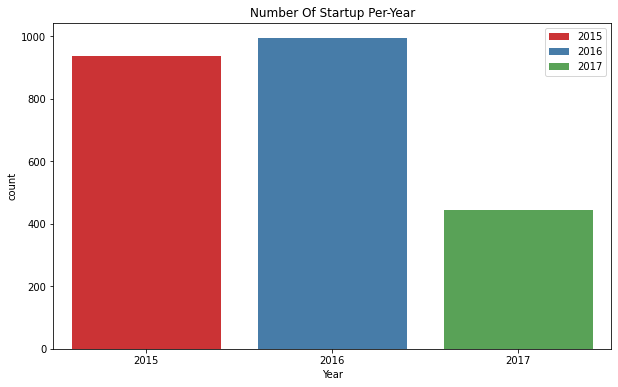

In [334]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Year', data=startup_prac, palette='Set1',hue='Year',dodge=False)
plt.title("Number Of Startup Per-Year")
plt.legend()
plt.show()

## Conclusion:
<li> There were many startup companies in the year 2016 than 2017.</li>
<li> The number of startups decreased drastically in 2017. Maybe due to demonetization happened on 8th november 2016.</li>
<li> There was gradule growth in startup from 2015-2016.</li>

## Pie Chart For Investment Trend

In [335]:
label = startup_prac['InvestmentType'].value_counts().index
value = startup_prac['InvestmentType'].value_counts().values
px.pie(values=value, labels=label, title='Investment Type', names=label)


## Conclusion:

<li> Around 54.3% of the startup have taken Seed Funding. Seed funding can be any amount of money, from any source, that helps move a business from the conceptual phase to the implementation phase</li>
<li> Around that 45.6% of startup have taken Private equity. Private equity is composed of funds and investors that directly invest in private companies.</li>
<li> Fewer startup went public in year 2015-2016 so the crowd fund taken was only 0.0855 %</li>


In [336]:
startup_prac.head()

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Year,Month,NewAmountInUSD
0,2017-01-08,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,PrivateEquity,"1,300,000",2017,1,1300000
1,2017-02-08,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,PrivateEquity,0,2017,2,0
2,2017-02-08,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",SeedFunding,0,2017,2,0
3,2017-02-08,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",SeedFunding,"500,000",2017,2,500000
4,2017-02-08,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",SeedFunding,"850,000",2017,2,850000


## Ploting Number Of Startups Per City Location

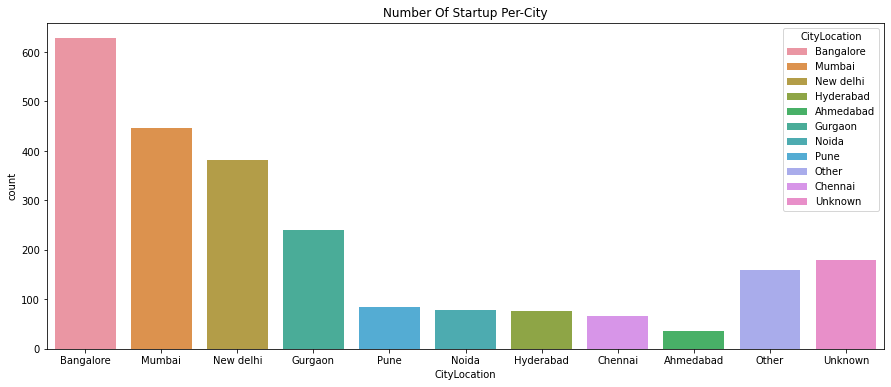

In [337]:
plt.figure(figsize=(15, 6))
sns.countplot(x='CityLocation', data=startup_prac, hue='CityLocation', dodge=False,
              order=['Bangalore', 'Mumbai', 'New delhi', 'Gurgaon', 'Pune', 'Noida','Hyderabad', 'Chennai', 'Ahmedabad',
                    'Other',  'Unknown']
              )
plt.title("Number Of Startup Per-City")
plt.show()


## Total Investment Per-Year

In [342]:
df = startup_prac.groupby("Year")['NewAmountInUSD'].sum().reset_index()
fig = px.line(df, x="Year", y="NewAmountInUSD", title="Total Investment Per-Year",text='NewAmountInUSD',markers=True)
fig.update_traces(textposition='top center')

## Conclusion:
<li>Investor invested heavily in year 2015 about 8.67 Billion Dollar</li>
<li>We can observe sudden dip in year 2016 it can be due to demonetization with investment of 3.82 Billion Dollar</li>
<li>After 2016 there is gradual growth in year 2017 with investment of 5.84 Billion Dollar</li>

## Investement Trend Analysis According To Startup

<li>We are grouping few startup by their name and year and then we are calculating the amount of money which is invested in company per year</li>

In [341]:
startup_group = startup_prac.groupby(['StartupName','Year'])['NewAmountInUSD'].sum().reset_index()
startup_group.sort_values(by=['Year','NewAmountInUSD'],ascending=False,inplace=True)

startup_list = startup_group.loc[startup_group['StartupName'].isin(['Flipkart','Paytm','Snapdeal','Ola','Oyo Rooms']),['StartupName','Year','NewAmountInUSD']].reset_index()

In [340]:
px.line(startup_list, x="Year", y="NewAmountInUSD", title="Total Investment Per-Year",color='StartupName',markers=True)